<a href="https://colab.research.google.com/github/Abhirami31/phyton-code/blob/main/project_NMp3_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.figure_factory as ff
from plotly.colors import n_colors
data=pd.read_csv('country_vaccinations.csv')
print(data)
matrix=data.values
print (matrix)

           country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
16261     Colombia      COL  2021-03-24           1385503.0   
16262     Colombia      COL  2021-03-25           1476364.0   
16263     Colombia      COL  2021-03-26           1596288.0   
16264     Colombia      COL  2021-03-27           1726924.0   
16265     Colombia      COL  2021-03-28           1818861.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN                     NaN   
2           

In [2]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              16266 non-null  object 
 1   iso_code                             16266 non-null  object 
 2   date                                 16266 non-null  object 
 3   total_vaccinations                   7614 non-null   float64
 4   people_vaccinated                    6941 non-null   float64
 5   people_fully_vaccinated              6639 non-null   float64
 6   daily_vaccinations_raw               6123 non-null   float64
 7   daily_vaccinations                   16223 non-null  float64
 8   total_vaccinations_per_hundred       7614 non-null   float64
 9   people_vaccinated_per_hundred        6941 non-null   float64
 10  people_fully_vaccinated_per_hundred  6639 non-null   float64
 11  daily_vaccinations_per_milli

In [3]:
data.isnull()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,False,False,False,False,False,True,True,True,False,False,True,True,False,False,False
1,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
2,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
3,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
4,False,False,False,True,True,True,True,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16261,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16262,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16263,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
16264,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
data.isnull().sum()


country                                    0
iso_code                                   0
date                                       0
total_vaccinations                      8652
people_vaccinated                       9325
people_fully_vaccinated                 9627
daily_vaccinations_raw                 10143
daily_vaccinations                        43
total_vaccinations_per_hundred          8652
people_vaccinated_per_hundred           9325
people_fully_vaccinated_per_hundred     9627
daily_vaccinations_per_million            43
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [5]:
data.fillna(value=0,inplace=True)
data.total_vaccinations=data.total_vaccinations.astype(int)
data.people_vaccinated=data.people_vaccinated.astype(int)
data.people_fully_vaccinated=data.people_fully_vaccinated.astype(int)
data.daily_vaccinations_raw=data.daily_vaccinations_raw.astype(int)
data.daily_vaccinations=data.daily_vaccinations.astype(int)
data.total_vaccinations_per_hundred=data.total_vaccinations_per_hundred.astype(int)
data.people_fully_vaccinated_per_hundred=data.people_fully_vaccinated_per_hundred.astype(int)
print(data)

           country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                   0   
1      Afghanistan      AFG  2021-02-23                   0   
2      Afghanistan      AFG  2021-02-24                   0   
3      Afghanistan      AFG  2021-02-25                   0   
4      Afghanistan      AFG  2021-02-26                   0   
...            ...      ...         ...                 ...   
16261     Colombia      COL  2021-03-24             1385503   
16262     Colombia      COL  2021-03-25             1476364   
16263     Colombia      COL  2021-03-26             1596288   
16264     Colombia      COL  2021-03-27             1726924   
16265     Colombia      COL  2021-03-28             1818861   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                      0                        0                       0   
1                      0                        0                       0   
2           

In [6]:
date=data.date.str.split('-',expand=True)
print(data)

           country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                   0   
1      Afghanistan      AFG  2021-02-23                   0   
2      Afghanistan      AFG  2021-02-24                   0   
3      Afghanistan      AFG  2021-02-25                   0   
4      Afghanistan      AFG  2021-02-26                   0   
...            ...      ...         ...                 ...   
16261     Colombia      COL  2021-03-24             1385503   
16262     Colombia      COL  2021-03-25             1476364   
16263     Colombia      COL  2021-03-26             1596288   
16264     Colombia      COL  2021-03-27             1726924   
16265     Colombia      COL  2021-03-28             1818861   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                      0                        0                       0   
1                      0                        0                       0   
2           

In [7]:
data['year']=date[0]
data['month']=date[1]
data['day']=date[2]
data.year=pd.to_numeric(data.year)
data.month=pd.to_numeric(data.month)
data.day=pd.to_numeric(data.day)
data.date=pd.to_datetime(data.date)
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0,0,0,0,0,0,0.0,0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-23,0,0,0,0,1367,0,0.0,0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23
2,Afghanistan,AFG,2021-02-24,0,0,0,0,1367,0,0.0,0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24
3,Afghanistan,AFG,2021-02-25,0,0,0,0,1367,0,0.0,0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25
4,Afghanistan,AFG,2021-02-26,0,0,0,0,1367,0,0.0,0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26


In [8]:
data.date=pd.to_datetime(data.date)
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0,0,0,0,0,0,0.0,0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-23,0,0,0,0,1367,0,0.0,0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23
2,Afghanistan,AFG,2021-02-24,0,0,0,0,1367,0,0.0,0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24
3,Afghanistan,AFG,2021-02-25,0,0,0,0,1367,0,0.0,0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25
4,Afghanistan,AFG,2021-02-26,0,0,0,0,1367,0,0.0,0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26


In [9]:
print('data point starts from',data.date.min())
print('data point ends at',data.date.max())
print('total number of countries in the data set',len(data.country.unique()))
print('total number of unique vaccines in the data set',len(data.vaccines.unique()))


data point starts from 2020-12-14 00:00:00
data point ends at 2022-03-29 00:00:00
total number of countries in the data set 43
total number of unique vaccines in the data set 31


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              16266 non-null  object        
 1   iso_code                             16266 non-null  object        
 2   date                                 16266 non-null  datetime64[ns]
 3   total_vaccinations                   16266 non-null  int64         
 4   people_vaccinated                    16266 non-null  int64         
 5   people_fully_vaccinated              16266 non-null  int64         
 6   daily_vaccinations_raw               16266 non-null  int64         
 7   daily_vaccinations                   16266 non-null  int64         
 8   total_vaccinations_per_hundred       16266 non-null  int64         
 9   people_vaccinated_per_hundred        16266 non-null  float64       
 10  people_ful

In [11]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,year,month,day
count,1.626600e+04,1.626600e+04,1.626600e+04,1.626600e+04,1.626600e+04,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000
mean,5.419351e+07,6.975981e+06,6.324705e+06,2.512792e+05,2.684377e+05,38.716156,18.294329,14.685848,3294.767921,2021.199680,6.155847,15.702570
std,3.235474e+08,4.525819e+07,5.224688e+07,1.540251e+06,1.520235e+06,62.375987,28.912035,25.571369,4352.671672,0.410696,3.570432,8.740643
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,1.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.922500e+02,0.000000,0.000000,0.000000,662.000000,2021.000000,3.000000,8.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.592000e+03,0.000000,0.000000,0.000000,2084.500000,2021.000000,6.000000,16.000000
75%,2.779477e+06,9.906318e+05,6.935770e+05,1.128550e+04,4.196800e+04,61.000000,32.950000,19.000000,4726.250000,2021.000000,9.000000,23.000000
max,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,261.000000,92.960000,91.000000,117497.000000,2022.000000,12.000000,31.000000


In [12]:
data.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia'], dtype=object)

In [13]:
country_wise_total_vaccinated={}
for country in data.country.unique() :
  vaccinated = 0
  for i in range(len(data)):
    if data.country[i]==country:
      vaccinated += data.daily_vaccinations[i]
  country_wise_total_vaccinated[country]=vaccinated
  country_wise_total_vaccinated_df=pd.DataFrame.from_dict(country_wise_total_vaccinated, orient='index',columns=['total_vaccinated_till_date'])
country_wise_total_vaccinated_df.sort_values(by = 'total_vaccinated_till_date', ascending=False,inplace=True)
country_wise_total_vaccinated_df

,total_vaccinated_till_date
China,3250342496
Brazil,411378534
Bangladesh,232845439
Argentina,96396690
Canada,82010216
Australia,56071891
Chile,50166643
Cambodia,36716148
Belgium,25221195
Austria,18131949


In [14]:
fig= px.bar(country_wise_total_vaccinated_df,
            y='total_vaccinated_till_date',
            x= country_wise_total_vaccinated_df.index,
            color='total_vaccinated_till_date',
            color_discrete_sequence=px.colors.sequential.Viridis_r
            )
fig.update_layout(
    title= {
        'text':"vaccination till date in various countires",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Countries",
    yaxis_title="Total vaccinated",
    legend_title="Total vaccinated"
)
fig.show()

In [15]:
fig=px.line(data,x='date',y= 'daily_vaccinations',color = 'country')
fig.update_layout(
    title= {
        'text':"vaccination till date in various countires",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily vaccinations"
)
fig.show()

In [16]:
imputer=SimpleImputer(strategy='mean')
x=np.array(data['people_vaccinated']).reshape(-1,1)
y=np.array(data['daily_vaccinations']).reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
imputer.fit_transform(x_train)
x_test=imputer.transform(x_test)
print(x_test)

[[10087787.]
 [       0.]
 [       0.]
 ...
 [       0.]
 [15867929.]
 [       0.]]


In [17]:
data.fillna(value=0,inplace=True)
data_encoded=pd.get_dummies(data,columns=['vaccines'])
print(data_encoded.head())

       country iso_code       date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG 2021-02-22                   0                  0   
1  Afghanistan      AFG 2021-02-23                   0                  0   
2  Afghanistan      AFG 2021-02-24                   0                  0   
3  Afghanistan      AFG 2021-02-25                   0                  0   
4  Afghanistan      AFG 2021-02-26                   0                  0   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                        0                       0                   0   
1                        0                       0                1367   
2                        0                       0                1367   
3                        0                       0                1367   
4                        0                       0                1367   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  ...  \
0                  

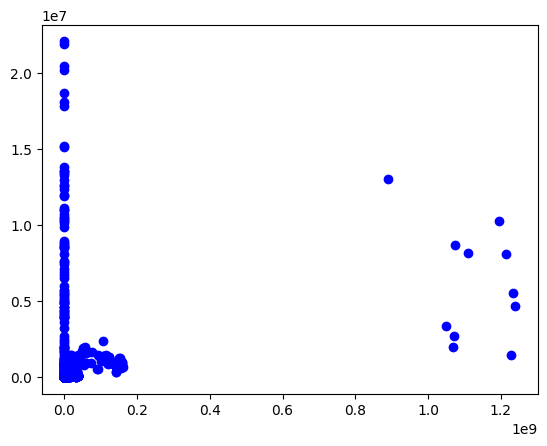

In [18]:
x=np.array(data['people_fully_vaccinated']).reshape(-1,1)
y=np.array(data['daily_vaccinations']).reshape(-1,1)
x_train,x_test,y_test,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
plt.scatter(x_test,y_test,color='b')
plt.show()

In [19]:
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)
print(x_scaled)
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[-0.12105793]
 [-0.12105793]
 [-0.12105793]
 ...
 [-0.11822307]
 [-0.1176879 ]
 [-0.11733901]]
[[-0.12105793]
 [-0.12105793]
 [-0.12105793]
 ...
 [-0.11822307]
 [-0.1176879 ]
 [-0.11733901]]


In [20]:
mean_vaccination = data['total_vaccinations'].mean()
median_vaccination= data['total_vaccinations'].median()
std_vaccination = data['total_vaccinations'].std()
print(f"Mean Vaccination: {mean_vaccination}")
print(f"Median Vaccination: {median_vaccination}")
print(f"Standard Deviation of Vaccination : {std_vaccination}")

Mean Vaccination: 54193513.32448051
Median Vaccination: 0.0
Standard Deviation of Vaccination : 323547449.5672021


In [21]:
mean_vaccination = data['people_vaccinated'].mean()
median_vaccination= data['people_vaccinated'].median()
std_vaccination = data['people_vaccinated'].std()
print(f"Mean Vaccination: {mean_vaccination}")
print(f"Median Vaccination: {median_vaccination}")
print(f"Standard Deviation of Vaccination : {std_vaccination}")

Mean Vaccination: 6975980.795462929
Median Vaccination: 0.0
Standard Deviation of Vaccination : 45258194.63583027


In [22]:
mean_vaccination = data['daily_vaccinations'].mean()
median_vaccination= data['daily_vaccinations'].median()
std_vaccination = data['daily_vaccinations'].std()
print(f"Mean Vaccination: {mean_vaccination}")
print(f"Median Vaccination: {median_vaccination}")
print(f"Standard Deviation of Vaccination : {std_vaccination}")

Mean Vaccination: 268437.6780400836
Median Vaccination: 5592.0
Standard Deviation of Vaccination : 1520234.9615521685


In [23]:
from scipy import stats
country_A = data[data['country'] == 'country_A']['total_vaccinations']
country_B = data[data['country'] == 'country_B']['total_vaccinations']
t_stat, p_value = stats.ttest_ind(country_A, country_B)
if p_value < 0.05:
 print("There is a significant difference between the two countries.")
else:
 print("There is no significant difference between the two countries.")

There is no significant difference between the two countries.


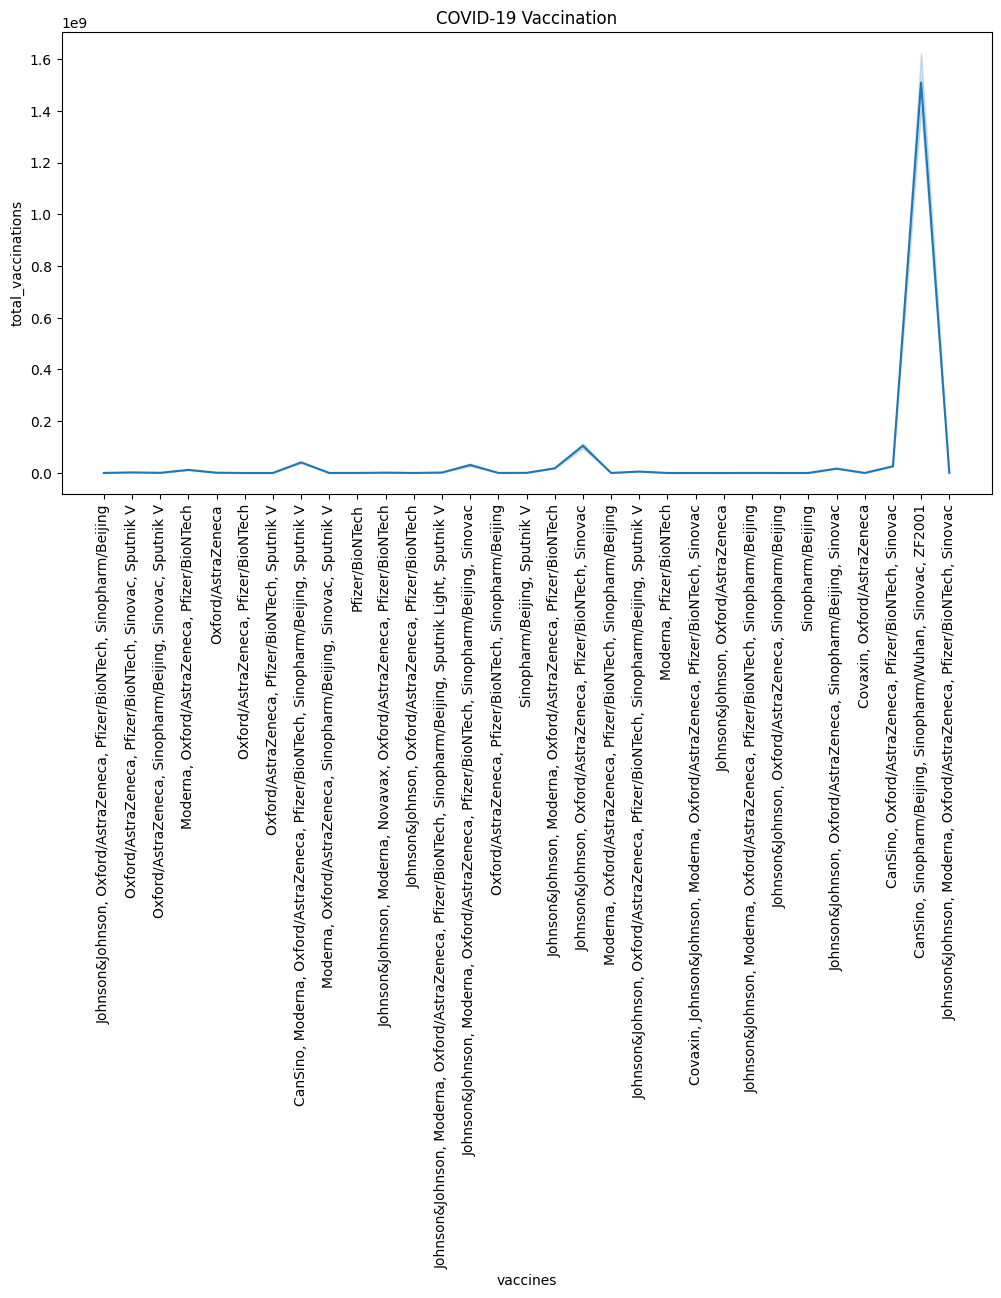

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data , x='vaccines',y='total_vaccinations')
plt.title('COVID-19 Vaccination')
plt.xlabel('vaccines')
plt.ylabel('total_vaccinations')
plt.xticks(rotation=90)
plt.show()

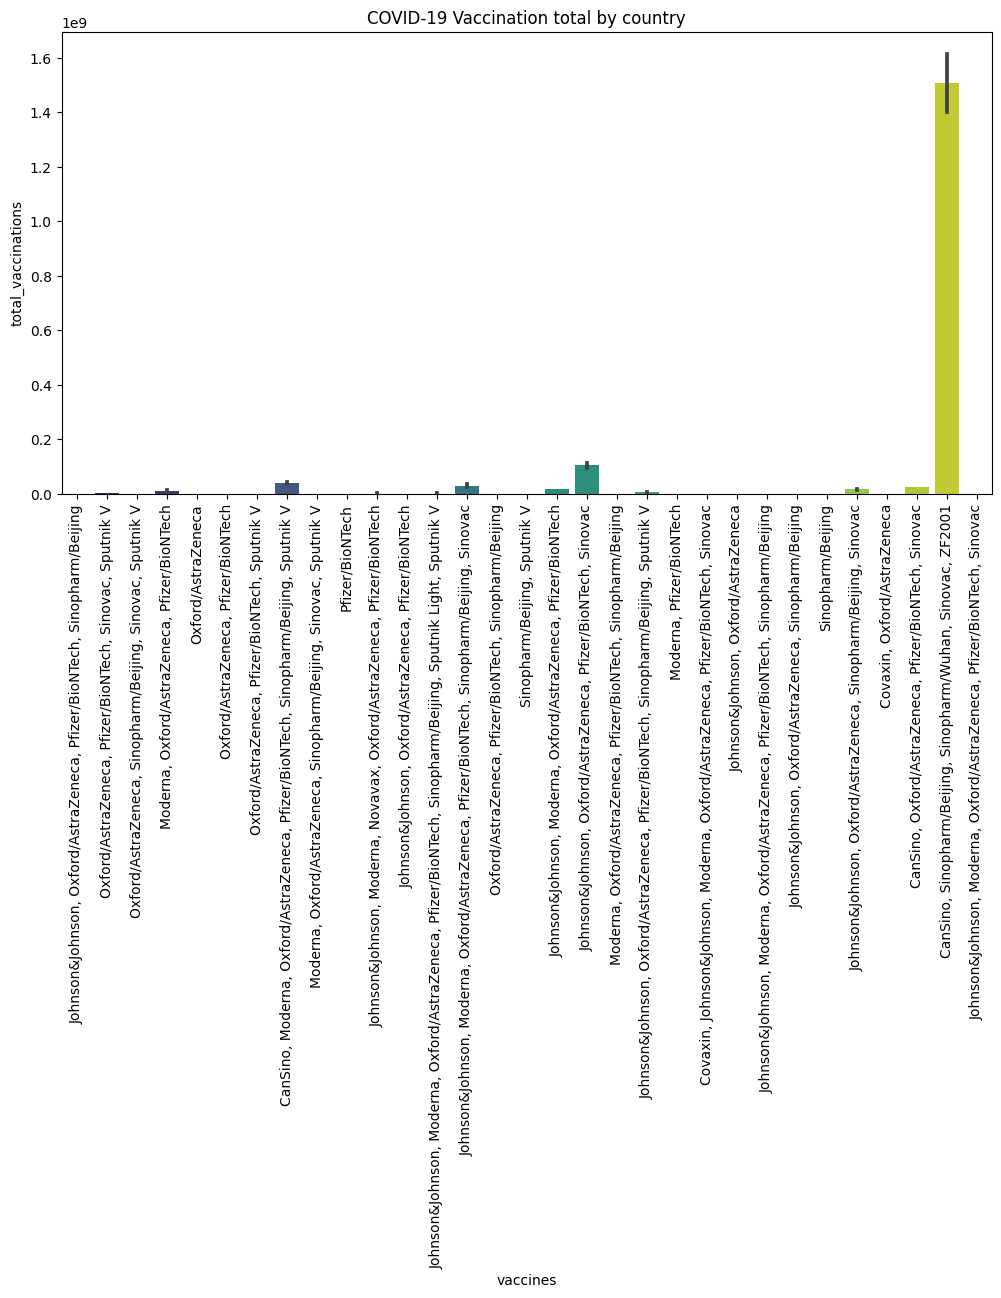

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data=data , x='vaccines',y='total_vaccinations',palette='viridis')
plt.title('COVID-19 Vaccination total by country')
plt.xlabel('vaccines')
plt.ylabel('total_vaccinations')
plt.xticks(rotation=90)
plt.show()

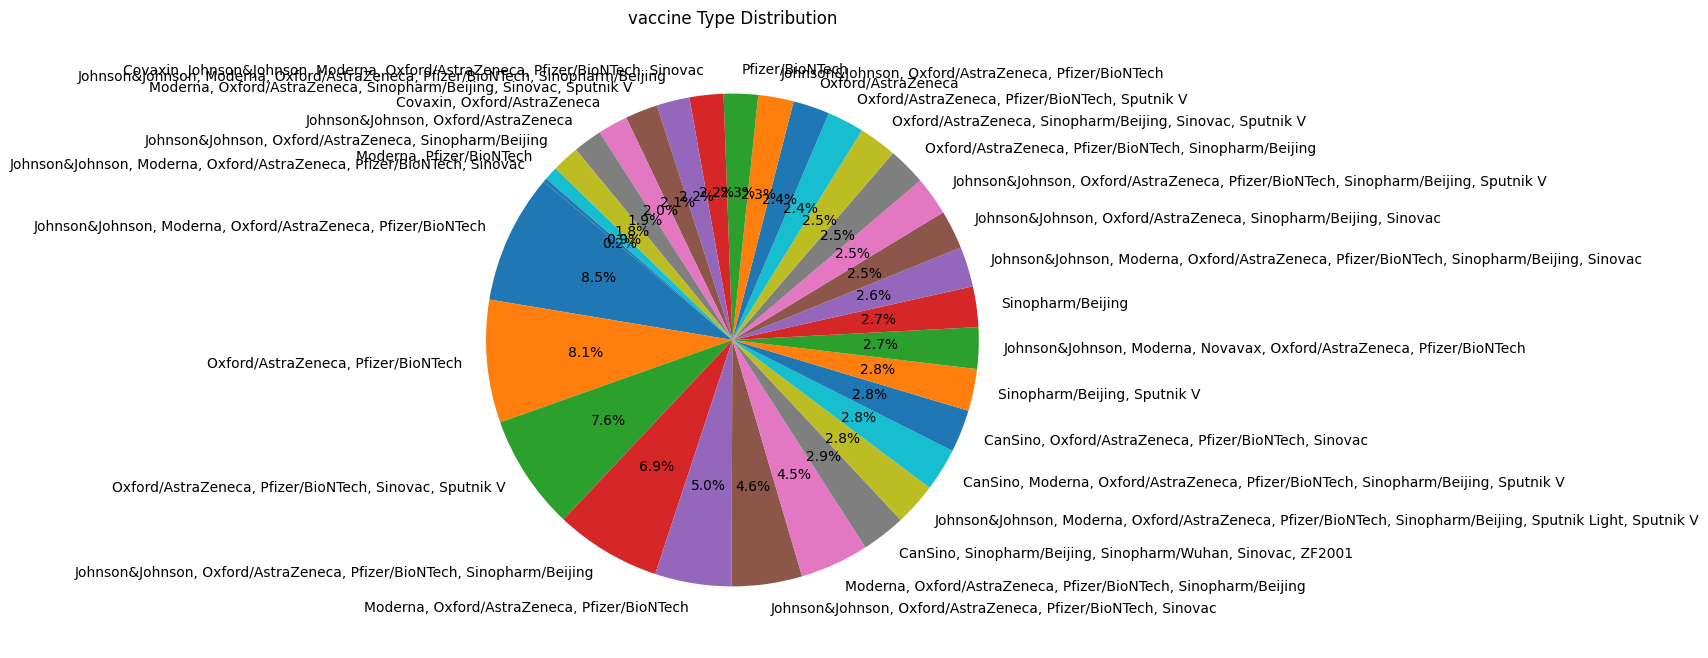

In [26]:
vaccine_type_counts = data['vaccines'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(vaccine_type_counts,labels = vaccine_type_counts.index ,autopct='%1.1f%%',startangle = 140)
plt.title('vaccine Type Distribution')
plt.show()